<a href="https://colab.research.google.com/github/JoseAnt96/Anexo-TFM/blob/main/Modelo_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# carga de datos
import pandas as pd
import io
from google.colab import files
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn import preprocessing 
from sklearn.decomposition import PCA
from scipy import cluster
import sklearn.neighbors
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import DBSCAN
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.neighbors
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import DBSCAN
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
    return df

In [ ]:
datos = upload_files()

Saving datos_modelo_v3.csv to datos_modelo_v3 (2).csv
User uploaded file "datos_modelo_v3.csv" with length 1520419 bytes


In [ ]:
x = datos.drop(['GAME_DATE_EST','GAME_ID', 'HOME_TEAM_ID','VISITOR_TEAM_ID','HOME_TEAM_WINS'],axis=1)
y = datos['HOME_TEAM_WINS']
one_hot_x = pd.get_dummies(x,drop_first=True)
one_hot_x = one_hot_x.drop(['conferencia_EW','conferencia_WE','conferencia_WW'], axis = 1)
one_hot_x.shape

(6589, 28)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(one_hot_x, y, test_size=0.20)

In [ ]:
classifier_original = XGBClassifier(criterion = 'entropy')
classifier_original.fit(X_train, y_train)
y_pred = classifier_original.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[224 318]
 [170 606]]
              precision    recall  f1-score   support

           0       0.57      0.41      0.48       542
           1       0.66      0.78      0.71       776

    accuracy                           0.63      1318
   macro avg       0.61      0.60      0.60      1318
weighted avg       0.62      0.63      0.62      1318



In [ ]:
xgb = XGBClassifier()

grid_xgb = {'max_depth': [None,1,2,3,4,5],
            'min_child_weight': [1,5,10,15],
            'learning_rate': [0.001,0.01,0.1,0.15],
            'gamma': [0,0.01,0.1,0.5],
            'colsample_bytree': [0.01,0.1,0.5,1],
            'n_estimators': [75,100,150]
             }

grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid = grid_xgb,
    n_jobs = 10,
    cv = 5,
    verbose=True
)


grid_search_xgb.fit(X_train, y_train)
grid_search_xgb.best_estimator_
best_grid_xgb = grid_search_xgb.best_estimator_
best_grid_xgb.fit(X = X_train, y = y_train)
xgb_pred = best_grid_xgb.predict(X_test)



Fitting 5 folds for each of 4608 candidates, totalling 23040 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    4.7s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   22.8s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   53.8s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:  1.6min
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:  2.6min
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:  3.8min
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:  5.2min
[Parallel(n_jobs=10)]: Done 3180 tasks      | elapsed:  6.8min
[Parallel(n_jobs=10)]: Done 4030 tasks      | elapsed:  8.5min
[Parallel(n_jobs=10)]: Done 4980 tasks      | elapsed: 10.5min
[Parallel(n_jobs=10)]: Done 6030 tasks      | elapsed: 12.8min
[Parallel(n_jobs=10)]: Done 7180 tasks      | elapsed: 15.5min
[Parallel(n_jobs=10)]: Done 8430 tasks      | elapsed: 18.3min
[Parallel(n_jobs=10)]: Done 9780 tasks      | elapsed: 21.5min
[Parallel(n_jobs=10)]: Done 11230 tasks      

NameError: ignored

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

[[195 347]
 [137 639]]
              precision    recall  f1-score   support

           0       0.59      0.36      0.45       542
           1       0.65      0.82      0.73       776

    accuracy                           0.63      1318
   macro avg       0.62      0.59      0.59      1318
weighted avg       0.62      0.63      0.61      1318



In [ ]:
grid_search_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.5,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=15, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

El resultado del análisis de hiperparámetros determina que el valor de los 4 parámetros a los que se han introducido un número de valores diferentes su resultado es el suguiente:

- max_depth: 5
- min_child_weight: 15
- learning_rate: 0.01
- gamma: 0.5
- colsample_bynode: 1
- n_estimators = 150

Estos serán los valores utilizados para los parámetros en los siguietes pasos.

In [ ]:
for i in range(4, 29):
  model = XGBClassifier(criterion = 'entropy', max_depth= 5, min_child_weight = 15, learning_rate = 0.01, gamma = 0.5,colsample_bynode = 1, n_estimators = 150)
  rfe = RFE(model, i)
  fit = rfe.fit(X_train, y_train)
  print("Num Features: %s" % (fit.n_features_))
  print("Selected Features: %s" % (fit.support_))
  print("Feature Ranking: %s" % (fit.ranking_))
  one_hot_x_SV = one_hot_x.iloc[:,fit.support_]
  X_train_SV, X_test_SV, y_train_SV, y_test_SV = train_test_split(one_hot_x_SV, y, test_size=0.20)
  
  model.fit(X_train_SV, y_train_SV)
  y_pred_sv = model.predict(X_test_SV)

  print(confusion_matrix(y_test_SV, y_pred_sv))
  print(classification_report(y_test_SV, y_pred_sv))

Num Features: 4
Selected Features: [False False  True False  True False False False False False False False
 False False False False False False False False False False False False
  True  True False False]
Feature Ranking: [ 6 21  1  3  1  2 19 17 15 22  4 11 24 14 20 10  5 16 25 13  7 12 23  8
  1  1  9 18]
[[197 362]
 [129 630]]
              precision    recall  f1-score   support

           0       0.60      0.35      0.45       559
           1       0.64      0.83      0.72       759

    accuracy                           0.63      1318
   macro avg       0.62      0.59      0.58      1318
weighted avg       0.62      0.63      0.60      1318

Num Features: 5
Selected Features: [False False  True False  True  True False False False False False False
 False False False False False False False False False False False False
  True  True False False]
Feature Ranking: [ 5 20  1  2  1  1 18 16 14 21  3 10 23 13 19  9  4 15 24 12  6 11 22  7
  1  1  8 17]
[[216 338]
 [136 628]]
     

In [ ]:
model = XGBClassifier(criterion = 'entropy', max_depth= 5, min_child_weight = 15, learning_rate = 0.01, gamma = 0.5,colsample_bynode = 1, n_estimators = 150)
one_hot_x_SV = one_hot_x.iloc[:,[0,2,3,4,5,10,16,20,23,24,25]]
X_train_SV, X_test_SV, y_train_SV, y_test_SV = train_test_split(one_hot_x_SV, y, test_size=0.20)
  
model.fit(X_train_SV, y_train_SV)
y_pred_sv = model.predict(X_test_SV)
print(confusion_matrix(y_test_SV, y_pred_sv))
print(classification_report(y_test_SV, y_pred_sv))

[[245 272]
 [165 636]]
              precision    recall  f1-score   support

           0       0.60      0.47      0.53       517
           1       0.70      0.79      0.74       801

    accuracy                           0.67      1318
   macro avg       0.65      0.63      0.64      1318
weighted avg       0.66      0.67      0.66      1318



In [ ]:
model.save_model('xgboost_SV.model')

In [ ]:
import joblib
filename = 'xgboost_model_SV.sav'
joblib.dump(model, filename)

['xgboost_model_SV.sav']

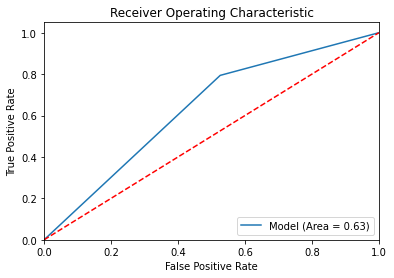

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# Calculate area under the curve (logit_roc_auc)
logit_roc_auc = roc_auc_score(y_test_SV, y_pred_sv) 
# Plot ROC
fpr, tpr, thresholds = roc_curve(y_test_SV, y_pred_sv)
plt.plot(fpr, tpr, label='Model (Area = %0.2f)' % logit_roc_auc) 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('XGBoost_ROC')
plt.show()

In [ ]:
from xgboost import plot_tree
import xgboost as xgb
xgb.plot_tree(model, num_trees=0, rankdir='LR')
plt.rcParams['figure.figsize'] = [300, 190]
plt.show()
